# Reuters Newswire Classification
*Charles Roberts, Kyle Rohde, Noah Trilling*

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

seed = 42
max_sequence_length = 300
vocabulary_size = 2000

## Exploratory Data Analysis
Load the newswire dataset, word index, and label names.

In [ ]:
(x_full, y_full), (x_foo, y_foo) = reuters.load_data(test_split=0, seed=seed)
index_by_word = reuters.get_word_index(path="reuters_word_index.json")
word_by_offset_index = {index + 3: word for word, index in index_by_word.items()}
label_names = reuters.get_label_names()
y_full_label_names_decoded = [label_names[label] for label in y_full]
num_classes = len(label_names)
print(f"Total samples: {len(x_full)}")
print(f"Total classes: {num_classes}")
print(f"Total vocabulary: {len(index_by_word)}")
print(f"Longest Sequence: {max([len(x) for x in x_full])}")
print(f"Shortest Sequence: {min([len(x) for x in x_full])}")
print(f"Average Sequence Length: {np.mean([len(x) for x in x_full])}")
sorted_word_index = sorted(index_by_word.items(), key=lambda x: x[1])
print(f"Top 50 Words: {sorted_word_index[:50]}")
print(f"Bottom 50 Words: {sorted_word_index[-50:]}")
print(f"All Classes: {label_names}")
print(f"Sample x: {x_full[0]}")
print(f"Sample y: {y_full[0]}")
print(f"Sample x (decoded): {[word_by_offset_index.get(i, '?') for i in x_full[0]]}")
print(f"Sample y (decoded): {label_names[y_full[0]]}")

Total samples: 11228
Total classes: 46
Total vocabulary: 30979
Longest Sequence: 2376
Shortest Sequence: 2
Average Sequence Length: 145.96419665122906
Top 25 Words: [('the', 1), ('of', 2), ('to', 3), ('in', 4), ('said', 5), ('and', 6), ('a', 7), ('mln', 8), ('3', 9), ('for', 10), ('vs', 11), ('dlrs', 12), ('it', 13), ('reuter', 14), ('000', 15), ('1', 16), ('pct', 17), ('on', 18), ('from', 19), ('is', 20), ('that', 21), ('its', 22), ('cts', 23), ('by', 24), ('at', 25), ('year', 26), ('be', 27), ('with', 28), ('2', 29), ('will', 30), ('was', 31), ('billion', 32), ('he', 33), ('u', 34), ('s', 35), ('net', 36), ('has', 37), ('would', 38), ('an', 39), ('as', 40), ('5', 41), ('not', 42), ('loss', 43), ('4', 44), ('1986', 45), ('company', 46), ('which', 47), ('but', 48), ('this', 49), ('shr', 50)]
Bottom 25 Words: [('teishoku', 30930), ('bbd', 30931), ('grandmarais', 30932), ('enahnce', 30933), ('jerritt', 30934), ('wilq', 30935), ('cogeca', 30936), ('unflappable', 30937), ('cogeco', 30938),

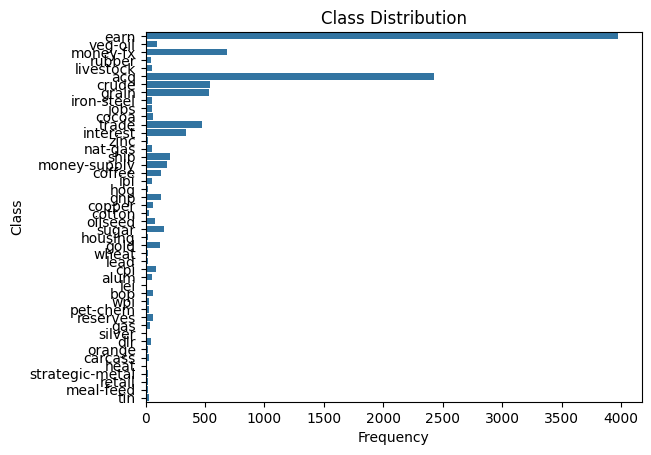

In [49]:
sns.countplot(y_full_label_names_decoded)
plt.title("Class Distribution")
plt.xlabel("Frequency")
plt.ylabel("Class")
plt.show()

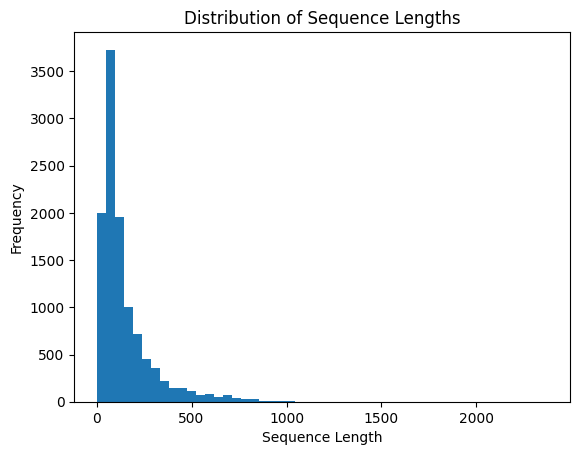

In [50]:
sequence_lengths = [len(seq) for seq in x_full]
plt.hist(sequence_lengths, bins=50)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

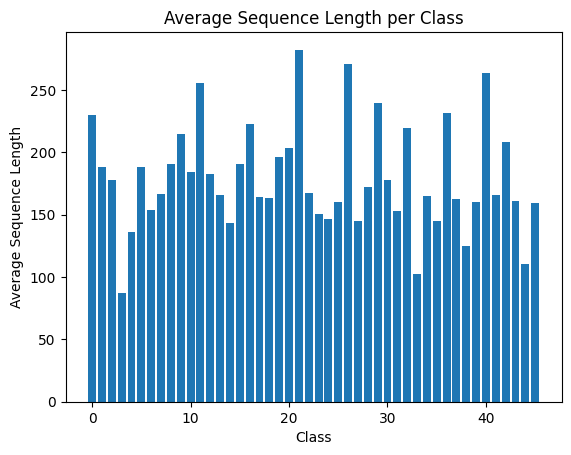

In [51]:
import numpy as np

avg_lengths_per_class = [np.mean([len(x_full[i]) for i in range(len(y_full)) if y_full[i] == label]) for label in range(len(label_names))]
plt.bar(range(len(label_names)), avg_lengths_per_class)
plt.title("Average Sequence Length per Class")
plt.xlabel("Class")
plt.ylabel("Average Sequence Length")
plt.show()

## Data Preprocessing

In [ ]:
(x_full, y_full), (x_foo, y_foo) = reuters.load_data(num_words=vocabulary_size, skip_top=50, maxlen=max_sequence_length, test_split=0, seed=seed)
x_full = [[token for token in sequence if token not in {0, 1, 2}] for sequence in x_full]
x_train, x_temp, y_train, y_temp = train_test_split(
    x_full, y_full, test_size=0.2, random_state=seed
)
x_test, x_val, y_test, y_val = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=seed
)
x_train_padded = pad_sequences(x_train, maxlen=max_sequence_length, padding="post")
x_val_padded = pad_sequences(x_val, maxlen=max_sequence_length, padding="post")
x_test_padded = pad_sequences(x_test, maxlen=max_sequence_length, padding="post")

## Classical Machine Learning

In [53]:
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train_padded, y_train)

y_val_pred = clf.predict(x_val_padded)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

y_test_pred = clf.predict(x_test_padded)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.08      0.33      0.13         3
           1       0.10      0.04      0.06        48
           2       0.00      0.00      0.00         7
           3       0.67      0.67      0.67       400
           4       0.27      0.29      0.28       189
           5       0.00      0.00      0.00         2
           6       0.08      0.33      0.13         3
           7       0.00      0.00      0.00         0
           8       0.05      0.07      0.06        14
           9       0.00      0.00      0.00        15
          10       0.12      0.05      0.07        22
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.08      0.02      0.03        48

c:\Users\NoahMSOE\Documents\GitHub\csc-6621-final-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\NoahMSOE\Documents\GitHub\csc-6621-final-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NoahMSOE\Documents\GitHub\csc-6621-final-project\.venv\Lib\site-packages\sklear

## Deep Learning

In [54]:
model = Sequential(
    [
        Embedding(
            input_dim=vocabulary_size, output_dim=64, input_length=max_sequence_length
        ),
        LSTM(64, return_sequences=False),
        Dense(64, activation="relu"),
        Dense(
            num_classes, activation="softmax"
        )
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

history = model.fit(
    x_train_padded,
    y_train,
    validation_data=(x_val_padded, y_val),
    epochs=5,
    batch_size=64,
)

c:\Users\NoahMSOE\Documents\GitHub\csc-6621-final-project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.3213 - loss: 2.8253 - val_accuracy: 0.4012 - val_loss: 2.3611
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3784 - loss: 2.3072 - val_accuracy: 0.4012 - val_loss: 2.3470
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3845 - loss: 2.3007 - val_accuracy: 0.4012 - val_loss: 2.3417
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3823 - loss: 2.3322 - val_accuracy: 0.4012 - val_loss: 2.3397
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3888 - loss: 2.2966 - val_accuracy: 0.4012 - val_loss: 2.3604


In [55]:

test_loss, test_accuracy = model.evaluate(x_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4047 - loss: 2.3014
Test Accuracy: 0.39


## Transfer Learning (Stretch Goal)

In [ ]:
embeddings_index = {}
embedding_dim = 100
with open("glove.6B.100d.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

for word, i in index_by_word.items():
    embedding_vector = embeddings_index.get(
        word
    )  # Get the GloVe vector for the word
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign it to the embedding matrix



model = Sequential(
    [
        Embedding(
            input_dim=vocabulary_size,  # Vocabulary size (num_words from word_index)
            output_dim=embedding_dim,  # GloVe embedding dimensionality (100)
            weights=[embedding_matrix],  # Use the pre-trained GloVe embeddings
            input_length=x_train_padded.shape[
                1
            ],  # Length of input sequences (padded sequences length)
            trainable=True,  # Freeze the embeddings (set True to allow fine-tuning)
        ),
        LSTM(64, return_sequences=False),
        Dense(64, activation="relu"),
        Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

history = model.fit(
    x_train_padded,
    y_train,
    validation_data=(x_val_padded, y_val),
    epochs=5,
    batch_size=64,
)

IndexError: index 12089 is out of bounds for axis 0 with size 2000

## Pretrained Model Fine-Tuning (Stretch Goal)